# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
latitude_longitude = []
cities = []

# Create a set of random lat and lng combinations
latitude = np.random.uniform(latitude_range[0], latitude_range[1], size=1500)
longitude = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
latitude_longitude = zip(latitude, longitude)

# Identify nearest city for each lat, lng combination
for lat_lng in latitude_longitude:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
WeatherPy = pd.DataFrame({"City": cities})
WeatherPy["Country"] = ""
WeatherPy["Date"] = ""      
WeatherPy["Latitude"] = ""
WeatherPy["Longitude"] = ""
WeatherPy["Cloudiness (%)"] = ""
WeatherPy["Humidity (%)"] = ""
WeatherPy["Max Temp (F)"] = ""
WeatherPy["Wind Speed (mph)"] = ""

In [24]:
# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in WeatherPy.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        WeatherPy.loc[index, "Country"] = weather_response["sys"]["country"]     
        WeatherPy.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        WeatherPy.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        WeatherPy.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        WeatherPy.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        WeatherPy.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        WeatherPy.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        WeatherPy.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | butaritari.
Processing Record 1  of Set 1 | risalpur.
Processing Record 2  of Set 1 | gbadolite.
Processing Record 3  of Set 1 | sur.
Processing Record 4  of Set 1 | taolanaro.
City not found...skipping taolanaro.
Processing Record 5  of Set 1 | paramonga.
Processing Record 6  of Set 1 | constitucion.
Processing Record 7  of Set 1 | nikolayevka.
Processing Record 8  of Set 1 | lavrentiya.
Processing Record 9  of Set 1 | faya.
Processing Record 10  of Set 1 | ziarat.
Processing Record 11  of Set 1 | zyryanovsk.
Processing Record 12  of Set 1 | kodiak.
Processing Record 13  of Set 1 | san patricio.
Processing Record 14  of Set 1 | beyneu.
Processing Record 15  of Set 1 | brae.
Processing Record 16  of Set 1 | carnarvon.
Processing Record 17  of Set 1 | rikitea.
Processing Record 18  of Set 1 | hermanus.
Processing Record 19  of Set 1 | mar del plata.
Processing Record 20  of Set 1 | barentsburg.
City n

Processing Record 24  of Set 4 | vardo.
Processing Record 25  of Set 4 | mahebourg.
Processing Record 26  of Set 4 | hojslev.
Processing Record 27  of Set 4 | flinders.
Processing Record 28  of Set 4 | chabahar.
Processing Record 29  of Set 4 | tevriz.
Processing Record 30  of Set 4 | vanimo.
Processing Record 31  of Set 4 | adwa.
Processing Record 32  of Set 4 | naze.
Processing Record 33  of Set 4 | one hundred mile house.
City not found...skipping one hundred mile house.
Processing Record 34  of Set 4 | bolungarvik.
City not found...skipping bolungarvik.
Processing Record 35  of Set 4 | ilulissat.
Processing Record 36  of Set 4 | souillac.
Processing Record 37  of Set 4 | beloha.
Processing Record 38  of Set 4 | namatanai.
Processing Record 39  of Set 4 | saskylakh.
Processing Record 40  of Set 4 | cap malheureux.
Processing Record 41  of Set 4 | biloxi.
Processing Record 42  of Set 4 | eskasem.
City not found...skipping eskasem.
Processing Record 43  of Set 4 | hami.
Processing Rec

Processing Record 2  of Set 8 | haines junction.
Processing Record 3  of Set 8 | mathbaria.
Processing Record 4  of Set 8 | port keats.
Processing Record 5  of Set 8 | moron.
Processing Record 6  of Set 8 | luba.
Processing Record 7  of Set 8 | hai duong.
Processing Record 8  of Set 8 | ochakiv.
Processing Record 9  of Set 8 | ribeira brava.
Processing Record 10  of Set 8 | caravelas.
Processing Record 11  of Set 8 | ranau.
Processing Record 12  of Set 8 | port hawkesbury.
Processing Record 13  of Set 8 | goderich.
Processing Record 14  of Set 8 | daru.
Processing Record 15  of Set 8 | aleksandrovka.
Processing Record 16  of Set 8 | san quintin.
Processing Record 17  of Set 8 | berdyaush.
Processing Record 18  of Set 8 | rapid valley.
Processing Record 19  of Set 8 | dolbeau.
City not found...skipping dolbeau.
Processing Record 20  of Set 8 | victoria.
Processing Record 21  of Set 8 | mgandu.
Processing Record 22  of Set 8 | urucara.
Processing Record 23  of Set 8 | bathsheba.
Processi

Processing Record 31  of Set 11 | kyaikto.
Processing Record 32  of Set 11 | matara.
Processing Record 33  of Set 11 | eldikan.
City not found...skipping eldikan.
Processing Record 34  of Set 11 | urucurituba.
Processing Record 35  of Set 11 | linxia.
Processing Record 36  of Set 11 | russell.
Processing Record 37  of Set 11 | nizwa.
Processing Record 38  of Set 11 | roma.
Processing Record 39  of Set 11 | deputatskiy.
Processing Record 40  of Set 11 | blackwater.
Processing Record 41  of Set 11 | litayen.
City not found...skipping litayen.
Processing Record 42  of Set 11 | acarau.
Processing Record 43  of Set 11 | chapais.
Processing Record 44  of Set 11 | hakvik.
City not found...skipping hakvik.
Processing Record 45  of Set 11 | weligama.
Processing Record 46  of Set 11 | jiddah.
City not found...skipping jiddah.
Processing Record 47  of Set 11 | zhigansk.
Processing Record 48  of Set 11 | inta.
Processing Record 49  of Set 11 | fallon.
Processing Record 0  of Set 12 | shakiso.
Proc

In [25]:
WeatherPy.count()

City                609
Country             609
Date                609
Latitude            609
Longitude           609
Cloudiness (%)      609
Humidity (%)        609
Max Temp (F)        609
Wind Speed (mph)    609
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
#display dataframe
WeatherPy.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,butaritari,KI,2021-10-04 14:17:50,3.0707,172.7902,95,70,82.184,5.14
1,risalpur,PK,2021-10-04 14:17:51,34.0619,71.9917,1,59,77.846,1.58
2,gbadolite,CD,2021-10-04 14:17:51,4.2833,21.0167,10,98,71.87,1.32
3,sur,OM,2021-10-04 14:17:52,22.5667,59.5289,3,72,83.75,5.39
4,taolanaro,,,,,,,,


In [26]:
#export city data into csv
WeatherPy.to_csv("output_data/cities.csv", encoding='utf-8', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot proves that as we generally move away from the equator, temperature drops


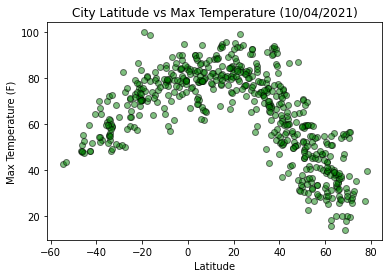

In [28]:
today = time.strftime('%m/%d/%Y')
plt.scatter(pd.to_numeric(WeatherPy['Latitude']).astype(float), pd.to_numeric(WeatherPy['Max Temp (F)']).astype(float), facecolors='green', edgecolors='black', alpha = 0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({today})')
print('The plot proves that as we generally move away from the equator, temperature drops.')

## Latitude vs. Humidity Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


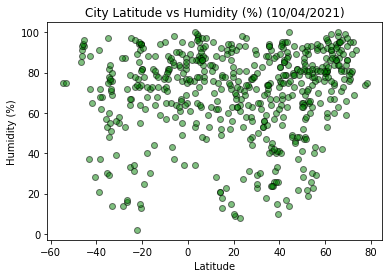

In [30]:
today = time.strftime('%m/%d/%Y')
plt.scatter(pd.to_numeric(WeatherPy['Latitude']).astype(float), pd.to_numeric(WeatherPy['Humidity (%)']).astype(float), facecolors='green', edgecolors='black', alpha = 0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity (%) ({today})')
print('The plot shows that there is no real pattern that can describe the relationship between latitude and humidity.')

## Latitude vs. Cloudiness Plot

In [ ]:
today = time.strftime('%m/%d/%Y')
plt.scatter(pd.to_numeric(WeatherPy['Latitude']).astype(float), pd.to_numeric(WeatherPy['Cloudiness (%)']).astype(float), facecolors='green', edgecolors='black', alpha = 0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({today})')
print('The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness.')


## Latitude vs. Wind Speed Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed.


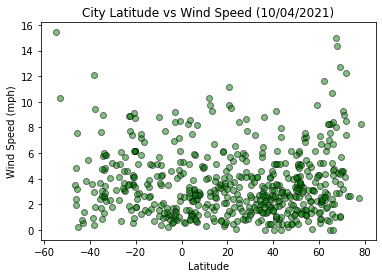

In [31]:
today = time.strftime('%m/%d/%Y')
plt.scatter(pd.to_numeric(WeatherPy['Latitude']).astype(float), pd.to_numeric(WeatherPy['Wind Speed (mph)']).astype(float), facecolors='green', edgecolors='black', alpha = 0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({today})')
print('The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed.')

## Linear Regression

In [32]:
# Create Northern and Southern Hemisphere DataFrames
northern = WeatherPy.loc[pd.to_numeric(WeatherPy['Latitude']).astype(float) > 0, :]
southern = WeatherPy.loc[pd.to_numeric(WeatherPy['Latitude']).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.83x + 93.84
The r-squared is: -0.8150700407775087
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


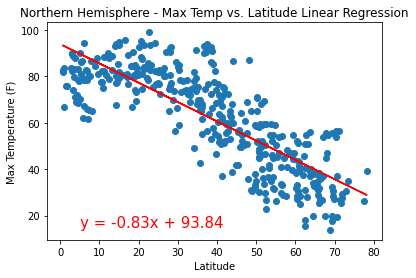

In [37]:
x_values = pd.to_numeric(northern['Latitude']).astype(float)
y_values = pd.to_numeric(northern['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'Regression line equation is: {line_eq}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(5,15),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f'The r-squared is: {rvalue}')
print('The regression displays a negative correlation.')
print('In the nothern hemisphere, as you move away from the equator the temperature decreases.')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.7x + 84.28
The r-squared is: 0.780373834387703
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


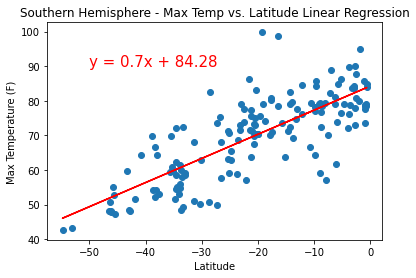

In [36]:
x_values = pd.to_numeric(southern['Latitude']).astype(float)
y_values = pd.to_numeric(southern['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'Regression line equation is: {line_eq}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(-50,90),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f'The r-squared is: {rvalue}')
print('The regression displays a positive correlation.')
print('In the southern hemisphere, as you get closer to the equator the temperature increases.')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.12x + 66.03
The r-squared is: 0.11099687523662002
The regression does not display much of a correlation between the data sets.


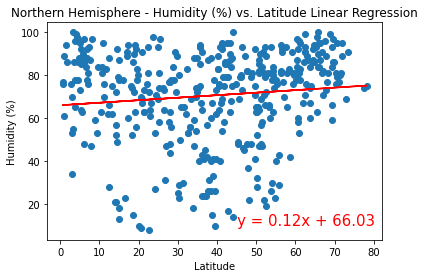

In [40]:
x_values = pd.to_numeric(northern['Latitude']).astype(float)
y_values = pd.to_numeric(northern['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'Regression line equation is: {line_eq}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(45,10),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f'The r-squared is: {rvalue}')
print('The regression does not display much of a correlation between the data sets.') 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.18x + 72.65
The r-squared is: 0.11491114201027028
The regression does not display much of a correlation between the data sets.


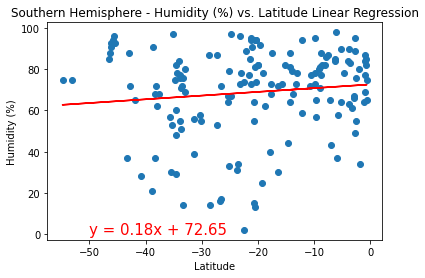

In [44]:
x_values = pd.to_numeric(southern['Latitude']).astype(float)
y_values = pd.to_numeric(southern['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'Regression line equation is: {line_eq}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(-50,0),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f'The r-squared is: {rvalue}')
print('The regression does not display much of a correlation between the data sets.')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.25x + 45.95
The r-squared is: 0.12214474316099741
The regression does not display much of a correlation between the data sets.


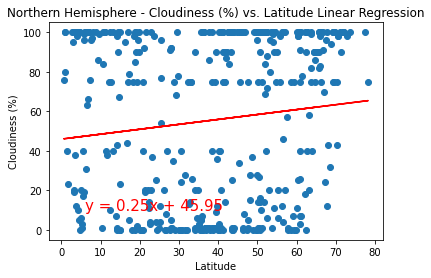

In [46]:
x_values = pd.to_numeric(northern['Latitude']).astype(float)
y_values = pd.to_numeric(northern['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'Regression line equation is: {line_eq}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f'The r-squared is: {rvalue}')
print('The regression does not display much of a correlation between the data sets.')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = pd.to_numeric(southern['Latitude']).astype(float)
y_values = pd.to_numeric(southern['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = pd.to_numeric(northern['Latitude']).astype(float)
y_values = pd.to_numeric(northern['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = pd.to_numeric(southern['Latitude']).astype(float)
y_values = pd.to_numeric(southern['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()